## Salary Prediction

In [547]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [548]:
df = pd.read_csv('./survey_results_public.csv') # read in matrix data from csv using pandas
df.head(5) # returns first 5 rows data

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [549]:
df = df[["Country","EdLevel","YearsCode","ConvertedComp"]] # shrinking the matrix
df = df.rename({"ConvertedComp":"Salary"},axis=1) # axis = 1 represents column
df = df.rename({"YearsCode":"Experience"},axis=1)
df.head(5)

,Country,EdLevel,Experience,Salary
0,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",36,NaN
1,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,NaN
2,Russian Federation,NaN,4,NaN
3,Albania,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",7,NaN
4,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",15,NaN


In [550]:
df = df[df["Salary"].notnull()]
df.head(10)

,Country,EdLevel,Experience,Salary
7,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",17,116000.0
9,United Kingdom,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",8,32315.0
10,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",10,40070.0
11,Spain,Some college/university study without earning ...,7,14268.0
12,Netherlands,"Secondary school (e.g. American high school, G...",35,38916.0
13,United States,"Associate degree (A.A., A.S., etc.)",5,66000.0
15,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",37,108576.0
16,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,79000.0
17,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",19,1260000.0
18,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9,83400.0


In [551]:
df = df.dropna()
df.head(10)

,Country,EdLevel,Experience,Salary
7,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",17,116000.0
9,United Kingdom,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",8,32315.0
10,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",10,40070.0
11,Spain,Some college/university study without earning ...,7,14268.0
12,Netherlands,"Secondary school (e.g. American high school, G...",35,38916.0
13,United States,"Associate degree (A.A., A.S., etc.)",5,66000.0
15,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",37,108576.0
16,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,79000.0
17,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",19,1260000.0
18,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9,83400.0


In [552]:
def combine_country(category,cutoff):
    country_map = {}
    for i in range(len(category)):
        if (category.values[i] < cutoff):
            country_map[category.index[i]] = "Other"
        else:
            country_map[category.index[i]] = category.index[i]
    return country_map

In [553]:
country_map = combine_country(df.Country.value_counts(),400)
df.loc[:, 'Country'] = df['Country'].map(country_map) # access group of rows or columns
df.Country.value_counts()

Country
Other                 10198
United States          8081
India                  2580
United Kingdom         2552
Germany                2207
Canada                 1297
Brazil                 1140
France                 1101
Netherlands             799
Poland                  791
Australia               754
Spain                   742
Italy                   662
Russian Federation      594
Sweden                  572
Name: count, dtype: int64

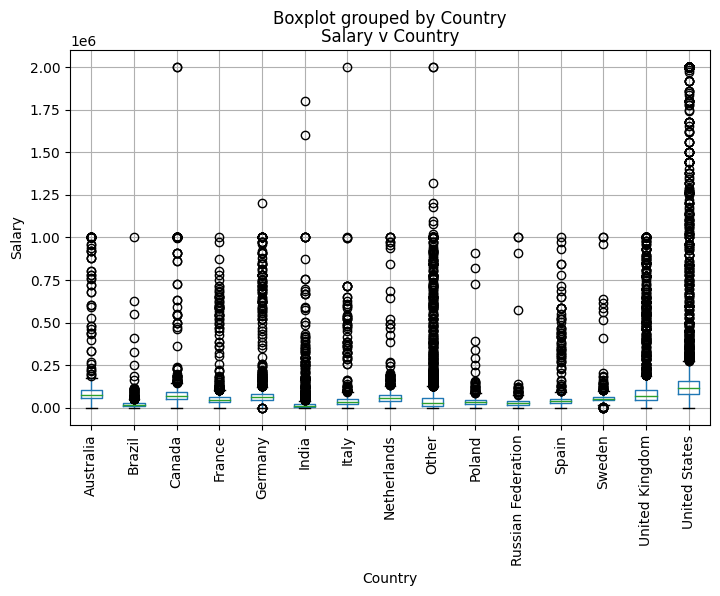

In [554]:
fig, ax = plt.subplots(1,1, figsize=(8, 5))
df.boxplot('Salary', 'Country', ax=ax)
plt.title('Salary v Country')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [555]:
df = df[df["Salary"] <= 250000]
df = df[df["Salary"] >= 10000]
df = df[df['Country'] != 'Other']

In [556]:
df["Experience"].unique()

array(['17', '8', '10', '7', '35', '5', '37', '9', '30', '4', '19', '20',
       '25', '16', '36', '6', '43', '23', '11', '38', '24', '21', '40',
       '15', '27', '12', '46', '13', '3', '33', '22', '18', '28', '14',
       '32', '44', '26', '42', '2', '34', '31', '29', '1', '41',
       'More than 50 years', '47', '39', 'Less than 1 year', '45', '50',
       '48', '49'], dtype=object)

In [557]:
def define_exp(x):
    if x == 'More than 50 years':
        return 50
    if x == 'Less than 1 year':
        return 0.5
    return float(x)

In [558]:
df.loc[:,'Experience'] = df['Experience'].apply(define_exp)
df.head(10)

,Country,EdLevel,Experience,Salary
7,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",17.0,116000.0
9,United Kingdom,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",8.0,32315.0
10,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",10.0,40070.0
11,Spain,Some college/university study without earning ...,7.0,14268.0
12,Netherlands,"Secondary school (e.g. American high school, G...",35.0,38916.0
13,United States,"Associate degree (A.A., A.S., etc.)",5.0,66000.0
15,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",37.0,108576.0
16,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7.0,79000.0
18,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9.0,83400.0
23,Germany,"Professional degree (JD, MD, etc.)",30.0,91883.0


In [559]:
df["Experience"].unique()

array([17.0, 8.0, 10.0, 7.0, 35.0, 5.0, 37.0, 9.0, 30.0, 4.0, 19.0, 20.0,
       25.0, 16.0, 36.0, 6.0, 43.0, 23.0, 11.0, 38.0, 24.0, 21.0, 40.0,
       15.0, 27.0, 12.0, 46.0, 13.0, 3.0, 33.0, 22.0, 18.0, 28.0, 14.0,
       32.0, 44.0, 26.0, 42.0, 2.0, 34.0, 31.0, 29.0, 1.0, 41.0, 50.0,
       47.0, 39.0, 0.5, 45.0, 48.0, 49.0], dtype=object)

In [560]:
df["EdLevel"].unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Some college/university study without earning a degree',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Professional degree (JD, MD, etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'Primary/elementary school',
       'I never completed any formal education'], dtype=object)

In [561]:
def clean_education(x):
    if "Bachelor" in x:
        return "Bachelor's degree"
    if "Master" in x:
        return "Master's degree"
    if "Professional degree" in x or "Other doctoral" in x:
        return "Post grad"
    return "Less than a Bachelors"

In [562]:
df.loc[:,'EdLevel'] = df['EdLevel'].apply(clean_education)
df.head(10)

,Country,EdLevel,Experience,Salary
7,United States,Bachelor's degree,17.0,116000.0
9,United Kingdom,Master's degree,8.0,32315.0
10,United Kingdom,Bachelor's degree,10.0,40070.0
11,Spain,Less than a Bachelors,7.0,14268.0
12,Netherlands,Less than a Bachelors,35.0,38916.0
13,United States,Less than a Bachelors,5.0,66000.0
15,United Kingdom,Bachelor's degree,37.0,108576.0
16,United States,Bachelor's degree,7.0,79000.0
18,United States,Bachelor's degree,9.0,83400.0
23,Germany,Post grad,30.0,91883.0


In [563]:
df["EdLevel"].unique()

array(["Bachelor's degree", "Master's degree", 'Less than a Bachelors',
       'Post grad'], dtype=object)

In [564]:
le_education = LabelEncoder()
df['EdLevel'] = le_education.fit_transform(df['EdLevel'])
df["EdLevel"].unique()

array([0, 2, 1, 3])

In [565]:
le_country = LabelEncoder()
df['Country'] = le_country.fit_transform(df['Country'])
df["Country"].unique()

array([13, 12, 10,  7,  4,  2,  6,  1,  3, 11,  5,  8,  0,  9])

In [566]:
X = df.drop('Salary',axis=1)
y = df['Salary']

In [567]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X, y.values)

LinearRegression()

In [568]:
y_pred = linear_reg.predict(X)

In [569]:
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$40,825.85


In [570]:
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor(random_state=0)
dec_tree_reg.fit(X, y.values)
y_pred = dec_tree_reg.predict(X)
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$32,136.36


In [571]:
from sklearn.ensemble import RandomForestRegressor
random_forest_reg = RandomForestRegressor(random_state=0)
random_forest_reg.fit(X, y.values)
y_pred = random_forest_reg.predict(X)
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$32,204.83


In [572]:
X

,Country,EdLevel,Experience
7,13,0,17.0
9,12,2,8.0
10,12,0,10.0
11,10,1,7.0
12,7,1,35.0
...,...,...,...
64122,13,1,6.0
64123,12,2,37.0
64127,13,3,15.0
64129,13,2,7.0


-------Prediction Complete----------

## Export to Web

In [573]:
import pickle # transport data over the network

In [574]:
data = {"model": dec_tree_reg, "le_country": le_country, "le_education": le_education}
with open('Model_Pickle_File.pkl', 'wb') as file:
    pickle.dump(data, file)

-------Saving Complete----------